<a href="https://www.kaggle.com/code/klyushnik/keras-regression-model?scriptVersionId=170740042" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None   

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold

import tensorflow as tf

import keras
from keras import layers

! pip install scikeras

from sklearn.model_selection import StratifiedKFold, KFold, StratifiedGroupKFold, RepeatedStratifiedKFold,RepeatedKFold, cross_validate
from scikeras.wrappers import KerasClassifier
from keras.layers import BatchNormalization, Flatten, Dense, Dropout
import keras
import keras_tuner
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from scikeras.wrappers import KerasRegressor

from sklearn.linear_model import SGDOneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.base import BaseEstimator, TransformerMixin

! pip install sdv

from sdv.single_table import CTGANSynthesizer
import sdv
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata

from sdv.evaluation.single_table import run_diagnostic


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e4/sample_submission.csv
/kaggle/input/playground-series-s4e4/train.csv
/kaggle/input/playground-series-s4e4/test.csv


2024-04-07 05:50:44.115497: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-07 05:50:44.115600: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-07 05:50:44.251261: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


INFO: pip is looking at multiple versions of sdmetrics to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.6/125.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.7/170.7 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.9 MB/s eta 0:00:00
  Attempting uninstall: botocore
    Found existing installation: botocore 1.34.51
    Uninstalling botocore-1.34.51:
      Successfully uninstalled botocore-1.34.51
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source

# Regression with Keras Deep Learning

**I'll try to easily create a neural network based on Keras**

![94132137-7d4fc100-fe7c-11ea-8512-69f90cb65e48.gif](http://user-images.githubusercontent.com/14011726/94132137-7d4fc100-fe7c-11ea-8512-69f90cb65e48.gif)

# Data

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e4/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e4/test.csv')

print(f'Shape train is {train.shape} and shape test is{test.shape}')

Shape train is (90615, 10) and shape test is(60411, 9)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [4]:
print(f'Numetric value:{train.select_dtypes(include=[np.number]).columns.values}')
print(f'Object value: {train.select_dtypes(exclude=[np.number]).columns.values}')

Numetric value:['id' 'Length' 'Diameter' 'Height' 'Whole weight' 'Whole weight.1'
 'Whole weight.2' 'Shell weight' 'Rings']
Object value: ['Sex']


![86128f3197f0c28cfe70bc9337cc51f9.gif](https://media.proglib.io/posts/2020/03/24/86128f3197f0c28cfe70bc9337cc51f9.gif)

**Let's clear the data and look at it**

In [5]:
print('Missing value:')
for col in train.columns:
    pct_missing = np.mean(train[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Missing value:
id - 0%
Sex - 0%
Length - 0%
Diameter - 0%
Height - 0%
Whole weight - 0%
Whole weight.1 - 0%
Whole weight.2 - 0%
Shell weight - 0%
Rings - 0%


In [6]:
print('Describe informations:')
train.describe()

Describe informations:


,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Categorical sign:


<Axes: xlabel='Sex'>

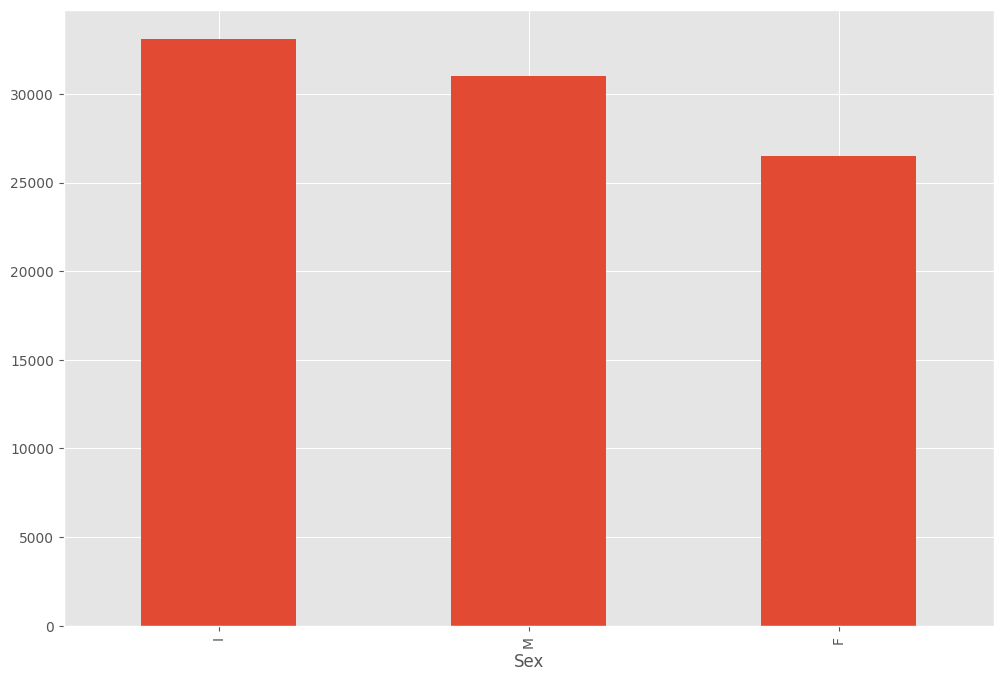

In [7]:
print('Categorical sign:')

train['Sex'].value_counts().plot.bar()

In [8]:
print('Non informative features:')

num_rows = len(train.index)
low_information_cols = [] #

for col in train.columns:
    cnts = train[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Non informative features:


In [9]:
train = train.drop(columns = ['id'], axis =1)
test = test.drop(columns = ['id'], axis =1)

print(f'Shape train is {train.shape} and shape test is{test.shape}')

Shape train is (90615, 9) and shape test is(60411, 8)


In [10]:
enc = LabelEncoder()
for i in train.select_dtypes(include=('object')).columns:
    train[i] = enc.fit_transform(train[i])
for i in test.select_dtypes(include=('object')).columns:
    test[i] = enc.fit_transform(test[i])
    
print(f'Shape train is {train.shape} and shape test is{test.shape}')

Shape train is (90615, 9) and shape test is(60411, 8)


# Synthetic Data Vault
![5efddf220926177fd161f725_fully_partially_synthetic_data_statice_header.PNG](https://assets-global.website-files.com/5d6060eb18edbee0be7240e8/5efddf220926177fd161f725_fully_partially_synthetic_data_statice_header.PNG)


In [11]:
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(train)
metadata.validate_data(data=train)

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(train)

synthetic_data = synthesizer.sample(num_rows=train.shape[0])
print(f'Our Synthetic Data: {synthetic_data.shape}')

/opt/conda/lib/python3.10/site-packages/sdv/single_table/base.py:80: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Our Synthetic Data: (90615, 9)


In [12]:
diagnostic = run_diagnostic(
    real_data=train,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 275.43it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%


In [13]:
train = pd.concat([train, synthetic_data], ignore_index=True)

print(f'Shape train is {train.shape} and shape test is{test.shape}')

Shape train is (181230, 9) and shape test is(60411, 8)


# X, y 

**Mark up the data**

![data.gif](https://oregonhunger.org/wp-content/uploads/2023/07/data.gif)

In [14]:
X = train.drop(columns = ['Rings'],axis =1)
y = train.Rings
X_total = test

In [15]:
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_total = X_total.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

print(f"X shape :{X.shape} , y shape :{y.shape}, X_total shape :{X_total.shape}")

X shape :(181230, 8) , y shape :(181230,), X_total shape :(60411, 8)


In [16]:
enc = LabelEncoder()
for i in X.select_dtypes(include=('object')).columns:
    X[i] = enc.fit_transform(X[i])
for i in X_total.select_dtypes(include=('object')).columns:
    X_total[i] = enc.fit_transform(X_total[i])
    
print(f"X shape :{X.shape} , y shape :{y.shape}, X_total shape :{X_total.shape}")

X shape :(181230, 8) , y shape :(181230,), X_total shape :(60411, 8)


# New features

![98yP.gif](https://i.gifer.com/98yP.gif)

**Let's try to get new features**

In [17]:
class AggFeatureExtractor(BaseEstimator, TransformerMixin):
    
    def __init__(self, group_col, agg_col, agg_func):
        self.group_col = group_col
        self.group_col_name = ''
        for col in group_col:
            self.group_col_name += col
        self.agg_col = agg_col
        self.agg_func = agg_func
        self.agg_df = None
        self.medians = None
        
    def fit(self, X, y=None):
        group_col = self.group_col
        agg_col = self.agg_col
        agg_func = self.agg_func
        
        self.agg_df = X.groupby(group_col)[agg_col].agg(agg_func)
        self.agg_df.columns = [f'{self.group_col_name}_{agg}_{_agg_col}' for _agg_col in agg_col for agg in agg_func]
        self.medians = X[agg_col].median()
        
        return self
    
    def transform(self, X):
        group_col = self.group_col
        agg_col = self.agg_col
        agg_func = self.agg_func
        agg_df = self.agg_df
        medians = self.medians
        
        X_merged = pd.merge(X, agg_df, left_on=group_col, right_index=True, how='left')
        X_merged.fillna(medians, inplace=True)
        X_agg = X_merged.loc[:, [f'{self.group_col_name}_{agg}_{_agg_col}' for _agg_col in agg_col for agg in agg_func]]
        
        return X_agg
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        X_agg = self.transform(X)
        return X_agg

In [18]:
class Preprocessor:
    def __init__(self, agg_col, agg_func, group_cols):
        self.agg_col = agg_col
        self.agg_func = agg_func
        self.group_cols = group_cols
        
    def preprocess(self, X, X_total):    
        agg_train, agg_test = [], []
        for group_col in self.group_cols:
            agg_extractor = AggFeatureExtractor(group_col=group_col, agg_col=self.agg_col, agg_func=self.agg_func)
            agg_extractor.fit(pd.concat([X, X_total], axis=0))
            agg_train.append(agg_extractor.transform(X))
            agg_test.append(agg_extractor.transform(X_total))
        X = pd.concat([X] + agg_train, axis=1)
        X_total = pd.concat([X_total] + agg_test, axis=1)
        
        X = X.fillna(0)
        X_total = X_total.fillna(0)
        return X, X_total

In [19]:
X.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight'],
      dtype='object')

In [20]:
agg_col = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight']

agg_func = ['mean', 'std']

group_cols = [['Sex', 'Length'],[ 'Diameter', 'Height'],['Whole weight','Whole weight.1'],
             ['Whole weight.2', 'Shell weight'], ['Length', 'Diameter'],[ 'Diameter', 'Height', 'Whole weight'],
              ['Height', 'Whole weight', 'Whole weight.1'], ['Whole weight.1',
       'Whole weight.2', 'Shell weight'], ['Sex', 'Length','Whole weight.2']]

pp = Preprocessor(agg_col, agg_func, group_cols)
X, X_total = pp.preprocess(X, X_total)

print(f"X shape :{X.shape} , y shape :{y.shape}, X_test shape :{X_total.shape}")

X shape :(181230, 152) , y shape :(181230,), X_test shape :(60411, 152)


In [21]:
transform = PowerTransformer(method='yeo-johnson')
transform_2 = QuantileTransformer(n_quantiles=10, random_state=0)
maxabs = MaxAbsScaler()
minmax = MinMaxScaler()
rob = RobustScaler()


for i in agg_col:
    X[i+'+log'] = (X[i]+1).transform(np.log)
    X_total[i+'+log'] =(X_total[i]+1).transform(np.log)
    
    X[i+'+log1'] = (X[i]+1).transform(np.log1p)
    X_total[i+'+log1'] =(X_total[i]+1).transform(np.log1p)
    
    X[i+'+sqrt'] = (X[i]+1).transform(np.sqrt)
    X_total[i+'+sqrt'] =(X_total[i]+1).transform(np.sqrt)
    

print(f"X shape :{X.shape} , y shape :{y.shape}, X_total shape :{X_total.shape}")

X shape :(181230, 176) , y shape :(181230,), X_total shape :(60411, 176)


In [22]:
def PolynomialFeatures_labeled(input_df,power):
   
    poly = preprocessing.PolynomialFeatures(power)
    output_nparray = poly.fit_transform(input_df)
    powers_nparray = poly.powers_

    input_feature_names = list(input_df.columns)
    target_feature_names = ["Constant Term"]
    for feature_distillation in powers_nparray[1:]:
        intermediary_label = ""
        final_label = ""
        for i in range(len(input_feature_names)):
            if feature_distillation[i] == 0:
                continue
            else:
                variable = input_feature_names[i]
                power = feature_distillation[i]
                intermediary_label = "%s+%d" % (variable,power)
                if final_label == "":         #If the final label isn't yet specified
                    final_label = intermediary_label
                else:
                    final_label = final_label + "x" + intermediary_label
        target_feature_names.append(final_label)
    output_df = pd.DataFrame(output_nparray, columns = target_feature_names)
    return output_df

output_df = PolynomialFeatures_labeled(X[train.select_dtypes(include=[np.number]).columns.values[:-1]],2)
output_df_t = PolynomialFeatures_labeled(X_total[train.select_dtypes(include=[np.number]).columns.values[:-1]],2)

In [23]:
X =  pd.concat([X.reset_index(drop=True), output_df], axis = 1)
X_total = pd.concat([X_total.reset_index(drop=True), output_df_t], axis = 1)

X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_total = X_total.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

print(f"X shape :{X.shape} , y shape :{y.shape}, X_total shape :{X_total.shape}")

X shape :(181230, 221) , y shape :(181230,), X_total shape :(60411, 221)


![cymbals-monkey-brain.gif](https://media.tenor.com/uN4esaC4FPwAAAAM/cymbals-monkey-brain.gif)

**Received**

# Threshold

![ebd89b5d-3ad6-4800-ba03-dae6f38d07fd_text.gif](https://y.yarn.co/ebd89b5d-3ad6-4800-ba03-dae6f38d07fd_text.gif)

In [24]:
def variance_threshold(df,th):
    var_thres=VarianceThreshold(threshold=th)
    var_thres.fit(df)
    new_cols = var_thres.get_support()
    return df.iloc[:,new_cols]

In [25]:
X = variance_threshold(X,0)
list_name = (X.columns)
X_total = X_total[list_name]

print(f"X shape :{X.shape} , y shape :{y.shape}, X_total shape :{X_total.shape}")

X shape :(181230, 198) , y shape :(181230,), X_total shape :(60411, 198)


**We have discarded all non-informative features**

# Build a model

![7OfG.gif](https://i.gifer.com/7OfG.gif)

In [26]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_total = scaler.fit_transform(X_total)

In [27]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() # TPU detection
except ValueError:
    tpu = None
    gpus = tf.config.experimental.list_logical_devices("GPU")
    
if tpu:
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu,) 
    print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
elif len(gpus) > 1:
    strategy = tf.distribute.MirroredStrategy([gpu.name for gpu in gpus])
    print('Running on multiple GPUs ', [gpu.name for gpu in gpus])
elif len(gpus) == 1:
    strategy = tf.distribute.get_strategy() 
    print('Running on single GPU ', gpus[0].name)
else:
    strategy = tf.distribute.get_strategy() 
    print('Running on CPU')
print("Number of accelerators: ", strategy.num_replicas_in_sync)

Running on single GPU  /device:GPU:0
Number of accelerators:  1


In [28]:
input_shape = [X.shape[1]]

In [29]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 1, 10)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(1, activation='linear'))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        loss='mean_absolute_error', optimizer='adam',metrics = ['mae']
    )
    return model

In [30]:
build_model(keras_tuner.HyperParameters())

<Sequential name=sequential, built=False>

In [31]:
hp = keras_tuner.HyperParameters()
print(hp.Int("units", min_value=32, max_value=512, step=12))

32


In [32]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_loss",
    max_trials=7,
    executions_per_trial=5,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = tf.cast(y_train, tf.float32)
y_test = tf.cast(y_test, tf.float32)

In [34]:
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Trial 7 Complete [00h 16m 38s]
val_loss: 1.5601869583129884

Best val_loss So Far: 1.3705395221710206
Total elapsed time: 01h 07m 54s


In [35]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 198)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 416)            │        82,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       213,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 480)            │       246,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 96)             │        46,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 588,801 (2.25 MB)

 Trainable params: 588,801 (2.25 MB)

 Non-trainable params: 0 (0.00 B)

![1700982900179191807.gif](https://cs14.pikabu.ru/post_img/2023/11/26/5/1700982900179191807.gif)

**Everything is ready to learn**

In [36]:
model = best_model
early_stopping = keras.callbacks.EarlyStopping(patience=25,
                                                   min_delta=0.001,
                                                   restore_best_weights=True,)
reduce_lr = keras.callbacks.ReduceLROnPlateau(factor = 0.1, patience = 15, mode = 'min', verbose = 1,)

model.compile(loss='mean_absolute_error', optimizer='adam',metrics = ['mae'])


model.fit(X_train, y_train,
            batch_size=5,
            epochs=200, 
            validation_data=(X_test, y_test),
            callbacks=[reduce_lr,early_stopping],)


Epoch 1/200
28997/28997 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - loss: 1.4111 - mae: 1.4111 - val_loss: 1.3925 - val_mae: 1.3926 - learning_rate: 0.0010
Epoch 2/200
28997/28997 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - loss: 1.3948 - mae: 1.3948 - val_loss: 1.3713 - val_mae: 1.3712 - learning_rate: 0.0010
Epoch 3/200
28997/28997 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - loss: 1.3948 - mae: 1.3948 - val_loss: 1.3862 - val_mae: 1.3863 - learning_rate: 0.0010
Epoch 4/200
28997/28997 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - loss: 1.3924 - mae: 1.3924 - val_loss: 1.3860 - val_mae: 1.3859 - learning_rate: 0.0010
Epoch 5/200
28997/28997 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - loss: 1.3862 - mae: 1.3862 - val_loss: 1.4180 - val_mae: 1.4178 - learning_rate: 0.0010
Epoch 6/200
28997/28997 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - loss: 1.3835 - mae: 1.3835 - val_loss: 1.3938 - val_mae: 1.3939 - learning_rate: 0.0010
Epoch 7/200
28997/28997 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - loss: 1.3891 - mae: 1.3891 - val_loss: 1.3762 - val_

In [37]:
predict_tensor = model.predict(X_total)

1888/1888 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


# Submit

In [38]:
sample = pd.read_csv('/kaggle/input/playground-series-s4e4/sample_submission.csv')
sample['Rings'] = predict_tensor
sample.to_csv('submission.csv', index=False)
sample.head(10)

,id,Rings
0,90615,9.388411
1,90616,9.352145
2,90617,9.009909
3,90618,9.168093
4,90619,6.747201
5,90620,8.965171
6,90621,12.120055
7,90622,5.725698
8,90623,7.910310
9,90624,11.376114
